##  Author : Riasad Alvi
### 22 Jan 2025

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats
!chmod 600 ~/.kaggle/kaggle.json

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
import zipfile
# Import the zipfile module to work with zip files.

# Open the zip file in read mode
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
# Open the 'dogs-vs-cats.zip' file so we can extract its contents.

# Extract all the files from the zip to the /content folder
zip_ref.extractall('/content')
# Extract everything inside the zip file to the /content folder.

# Close the zip file after extracting
zip_ref.close()
# Close the zip file to finish and save memory.


In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg19 import VGG19

In [13]:
conv_base = VGG19(
    weights='imagenet',  # Use pre-trained weights from the ImageNet dataset
    include_top=False,  # Exclude the fully connected (top) layers from VGG19 (we only want the convolutional base)
    input_shape=(224, 224, 3)  # Set the input shape of the images (224x224 RGB images)
)



### **Purpose and Significance**:
- **Purpose**: Loads the pre-trained VGG19 model, excluding the fully connected layers (top) so that only the convolutional base is used. The input image size is set to 224x224 pixels with 3 color channels (RGB).
- **Significance**:
  - **Transfer Learning**: The pre-trained weights from ImageNet help the model recognize patterns in images, making it easier to apply it to new tasks without starting from scratch.
  - **Custom Input Shape**: The model is now configured to accept input images of size 224x224 pixels, which is the standard input size for VGG19. This allows the model to process high-resolution images efficiently.

In [14]:
conv_base.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model = Sequential()
# Create a Sequential model, which allows stacking layers in a linear fashion.

model.add(conv_base)
# Add the convolutional base (VGG19) as the first layer, using pre-trained weights. It extracts features from the images.

model.add(Flatten())
# Flatten the 3D feature maps from the convolutional layers into a 1D vector to prepare it for the fully connected layers.

model.add(Dense(256, activation='relu'))
# Add a fully connected (Dense) layer with 256 neurons and ReLU activation. This layer helps in learning higher-level features.

model.add(Dense(1, activation='sigmoid'))
# Add the output layer with 1 neuron and sigmoid activation. This is used for binary classification (output is either 0 or 1).




### **Purpose and Significance**:
- **Purpose**: This code builds a neural network with the VGG19 convolutional base for feature extraction, followed by fully connected layers to classify the features.
- **Significance**:
  - **Transfer Learning**: The convolutional base is pre-trained on ImageNet, which allows the model to leverage learned features from a large dataset.
  - **Flattening**: The `Flatten()` layer converts 3D data into a 1D vector so it can be processed by the fully connected layers.
  - **Fully Connected Layers**: These layers learn complex patterns from the extracted features and perform binary classification based on the sigmoid output.

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,447,425 (100.89 MB)

 Trainable params: 26,447,425 (100.89 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
conv_base.trainable = False
# Set the convolutional base (VGG19) to be non-trainable.




### **Purpose and Significance**:
- **Purpose**: Freezes the weights of the convolutional base so that they are not updated during training. Only the weights of the fully connected layers (added later) will be trained.
- **Significance**:
  - **Transfer Learning**: This is commonly done in transfer learning to preserve the pre-trained knowledge in the convolutional base and prevent it from being altered, focusing the training on the new layers.
  - **Reduced Training Time**: Freezing the base layers reduces the number of trainable parameters, speeding up training and requiring less computational power.

In [22]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',  # Path to the training dataset directory.
    labels='inferred',  # Automatically infer labels from the folder names.
    label_mode='int',  # The labels will be returned as integers (e.g., 0 or 1).
    batch_size=32,  # Number of images in each batch for training.
    image_size=(224,224)  # Resize the images to 224x224 pixels for uniformity.
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',  # Path to the testing/validation dataset directory.
    labels='inferred',  # Automatically infer labels from the folder names.
    label_mode='int',  # The labels will be returned as integers.
    batch_size=32,  # Number of images in each batch for validation.
    image_size=(224,224)  # Resize the images to 224x224 pixels.
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.



### **Purpose and Significance**:
- **Purpose**: Loads the training and validation datasets from the specified directories, automatically inferring the labels based on folder names, and resizing the images to a consistent size of 150x150 pixels.
- **Significance**:
  - **Batch Processing**: `batch_size=32` allows the model to process multiple images at once, improving training efficiency.
  - **Data Augmentation**: By resizing the images to the same size (150x150), the model can process them consistently.
  - **Ease of Use**: Using `image_dataset_from_directory` simplifies loading image data and labels, making it easier to prepare the dataset for training and validation without manual preprocessing.

In [23]:
# Normalize
def process(image, label):
    image = tensorflow.cast(image / 255., tensorflow.float32)  # Normalize the image pixel values to the range [0, 1]
    return image, label  # Return the processed image and the corresponding label.

train_ds = train_ds.map(process)  # Apply the 'process' function to each image-label pair in the training dataset.
validation_ds = validation_ds.map(process)  # Apply the 'process' function to each image-label pair in the validation dataset.



### **Purpose and Significance**:
- **Purpose**: The `process` function normalizes the pixel values of the images by dividing them by 255, converting them to float32 format, and then applies this transformation to both the training and validation datasets.
- **Significance**:
  - **Normalization**: Dividing pixel values by 255 ensures that the pixel values fall within the range [0, 1], which is often beneficial for model training, as it helps the model converge faster and improves numerical stability.
  - **Consistency**: Applying this normalization to both training and validation datasets ensures consistency in input data, enabling the model to learn effectively from both sets.

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# optimizer='adam': Specifies Adam as the optimization algorithm. It adapts the learning rate based on the data, making it efficient for most cases.
# loss='binary_crossentropy': Defines the loss function for binary classification tasks. It calculates the difference between the predicted probability and the actual label.
# metrics=['accuracy']: Tells the model to track accuracy during training and evaluation. It measures the proportion of correct predictions.



### **Purpose and Significance**:
- **Purpose**: This line prepares the model for training by specifying the optimizer, loss function, and evaluation metric.
- **Significance**:
  - **Optimizer (Adam)**: Adam is an efficient optimization algorithm that adjusts learning rates for different parameters, making it suitable for a wide range of problems.
  - **Loss Function (Binary Cross-Entropy)**: This loss function is used for binary classification problems (e.g., distinguishing between two classes like cat vs. dog), helping the model minimize the difference between predicted and actual outcomes.
  - **Metrics (Accuracy)**: Accuracy is used to evaluate the performance of the model by calculating the percentage of correct predictions. It's a straightforward and intuitive metric for classification tasks.

In [25]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
# train_ds: The training dataset to be used for training the model.
# epochs=10: Specifies the number of times the model will iterate through the entire training dataset (10 epochs).
# validation_data=validation_ds: Specifies the validation dataset, which the model will use to evaluate its performance after each epoch.


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 221ms/step - accuracy: 0.8223 - loss: 0.5933 - val_accuracy: 0.8732 - val_loss: 0.2858
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.9227 - loss: 0.1908 - val_accuracy: 0.9216 - val_loss: 0.1896
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 201ms/step - accuracy: 0.9411 - loss: 0.1446 - val_accuracy: 0.9298 - val_loss: 0.1781
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 201ms/step - accuracy: 0.9564 - loss: 0.1069 - val_accuracy: 0.9078 - val_loss: 0.2446
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.9593 - loss: 0.1016 - val_accuracy: 0.9304 - val_loss: 0.1947
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 226ms/step - accuracy: 0.9659 - loss: 0.0876 - val_accuracy: 0.9240 - val_loss: 0.2178
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 225ms/step - accuracy: 0.9782 - loss: 0.0595 - val_accuracy: 0.8970 - val_loss: 0.3437
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.9824 -

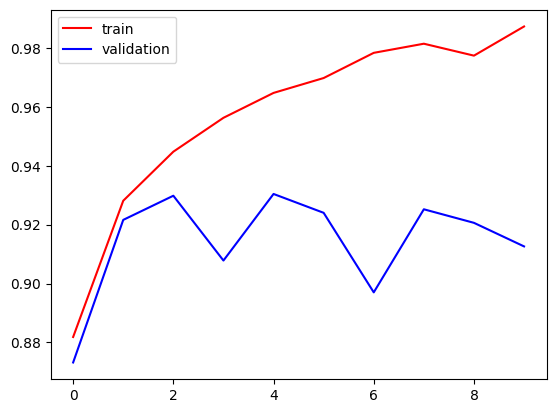

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## There is a lot of overfitting issue :(

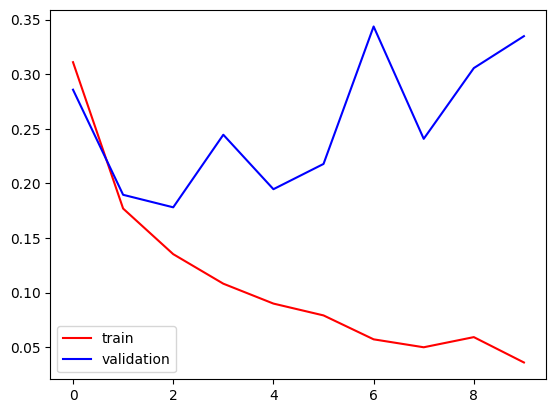

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()